# Testing Toy Dataset Generation

In [1]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import torch
from torch_geometric.data import Data
from torch.utils.data import DataLoader, Dataset
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
import scipy as sp
import wandb

import warnings

warnings.filterwarnings("ignore")
sys.path.append("../")
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
from lightning_modules.toyGNN.generation_utils import generate_toy_dataset

In [3]:
dataset_config = {
    'num_events': 1,
    'num_tracks': 2,
    'track_dis_width': 0,
    'num_layers': 10,
    'min_r': 0.5,
    'max_r': 2.0,
    'detector_width': 0.5,
    'ptcut': 0.,
    'nhits': 1
}

In [17]:
dataset = generate_toy_dataset(**dataset_config)

torch.Size([2, 120])


In [18]:
sample = dataset[0]

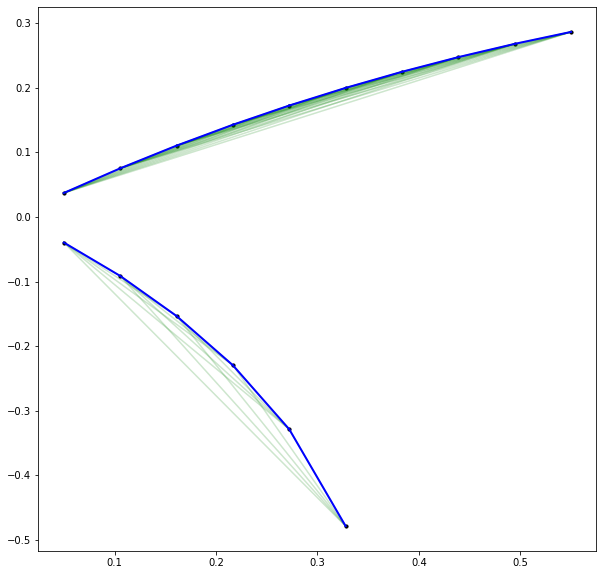

In [21]:
# Plot the graph
def plot_graph(sample):
    truth_mask = sample.y == 1
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(sample.x[:,0], sample.x[:,1], s=10, c="k")
    ax.plot(sample.x[sample.all_signal_edges,0], sample.x[sample.all_signal_edges,1], c='g', alpha=0.1)
    ax.plot(sample.x[sample.seq_signal_edges,0], sample.x[sample.seq_signal_edges,1], c='b', alpha=1, linewidth=2)
    plt.show()

plot_graph(sample)

<AxesSubplot:ylabel='Count'>

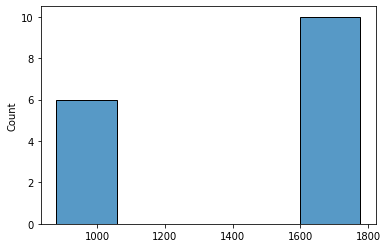

In [22]:
sns.histplot(sample.pt)